In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx


In [15]:
def plot_predictions_vs_ground_truth(json_file_path, ax=None):
    # Read the JSON file
    with open(json_file_path, 'r') as file:
        data = json.load(file)
    
    # Extract predictions and ground truth
    predictions = np.array(data['predictions'])
    ground_truth = np.array(data['ground_truth'])
    
    # Plot the scatter points
    plt.scatter(ground_truth, predictions, color='blue', alpha=0.2, label='Data Points')
    
    # Calculate the range for the x=y line
    min_val = min(ground_truth.min(), predictions.min())
    max_val = max(ground_truth.max(), predictions.max())
    
    # Plot x=y line
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='x=y Line')
    
    # Customize the plot
    plt.xlabel('Ground Truth')
    plt.ylabel('Predictions')
    plt.title('Predictions vs Ground Truth')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # Set aspect ratio to equal for a square plot
    plt.axis('equal')
    
    # Adjust plot limits to include all points
    plt.xlim(min_val, max_val)
    plt.ylim(min_val, max_val)
    
    # Show the plot
    plt.tight_layout()
    plt.show()


GNN


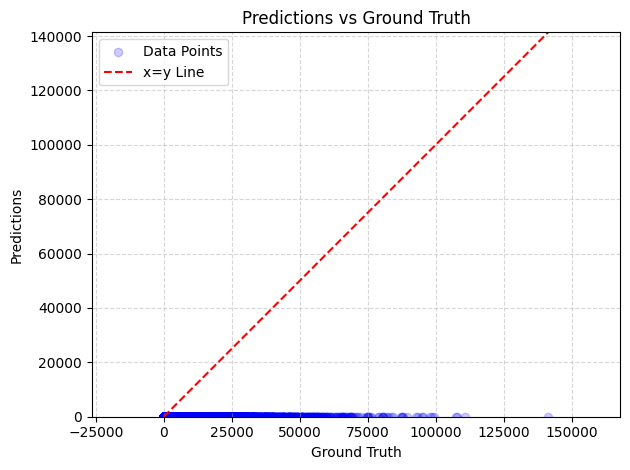

GNNAK


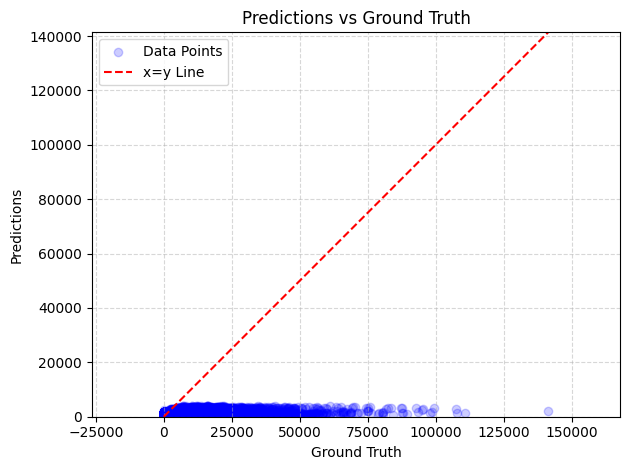

IDGNN


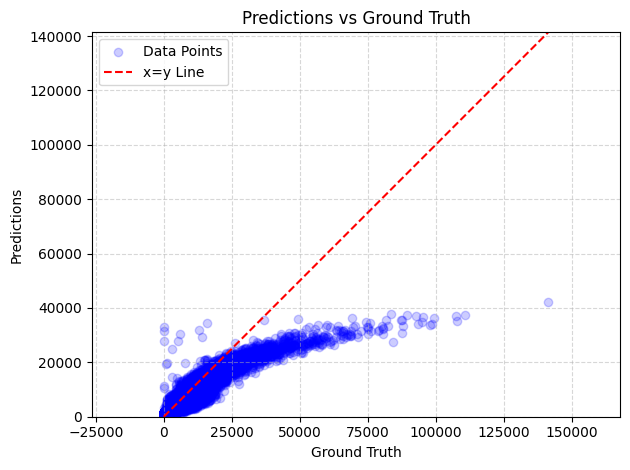

PPGN


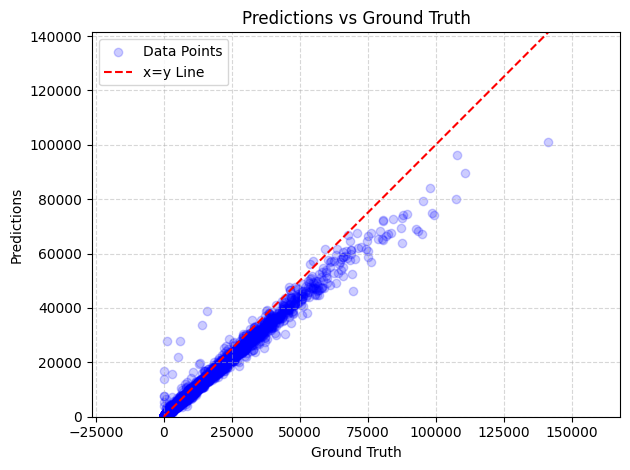

I2GNN
Error processing results I2GNN: [Errno 2] No such file or directory: '/home/zxj/Dev/MLSC/output/runtime/Set_6/I2GNN/target_2.json'


In [38]:
MODELS = ["GNN", "GNNAK", "IDGNN", "PPGN", "I2GNN"]
for model in MODELS:
    print(model)
    json_file_path = f'/home/zxj/Dev/MLSC/output/runtime/Set_6/{model}/target_2.json'
    try:
        plot_predictions_vs_ground_truth(json_file_path)
    except Exception as e:
        print(f"Error processing results {model}: {e}")
    

In [3]:
pattern_index = [3, 6, 7, 14, 13, 16, 15, 17, 18, 31, 30, 29, 35, 36, 34, 38, 37, 40, 42, 41, 44, 43, 46, 45, 47, 48, 49, 50, 51, 52]

In [4]:
def plot_predictions_vs_ground_truth(json_file_path, ax=None, idx=0):
    # Read the JSON file
    try:
        with open(json_file_path, 'r') as file:
            data = json.load(file)
    except FileNotFoundError:
        raise FileNotFoundError(f"The file {json_file_path} was not found.")
    except json.JSONDecodeError:
        raise ValueError(f"The file {json_file_path} is not a valid JSON file.")
    
    # Extract predictions and ground truth
    try:
        predictions = np.array(data['predictions'])
        ground_truth = np.array(data['ground_truth'])
    except KeyError as e:
        raise KeyError(f"Missing key in JSON data: {e}")
    
    # Validate that predictions and ground_truth are of the same length
    if predictions.shape != ground_truth.shape:
        raise ValueError("Predictions and Ground-Truth arrays must have the same shape.")
    
    # If no axis is provided, create one
    created_ax = False
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 8))
        created_ax = True
    
    # Plot the scatter points
    scatter = ax.scatter(ground_truth, predictions, color='blue', alpha=0.2, label='Data Points')
    
    # Calculate the range for the x=y line with some padding
    padding = 0.05  # 5% padding
    min_val = min(ground_truth.min(), predictions.min())
    max_val = max(ground_truth.max(), predictions.max())
    range_val = max_val - min_val
    min_val_padded = min_val - padding * range_val
    max_val_padded = max_val + padding * range_val
    
    # Plot x=y line
    ax.plot([min_val_padded, max_val_padded], [min_val_padded, max_val_padded],
            color='red', linestyle='--', label='x=y Line')
    
    # Customize the plot
    ax.set_xlabel('Ground Truth')
    ax.set_ylabel('Predictions')
    ax.set_title('Predictions vs Ground Truth')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    
    # Set aspect ratio to equal for a square plot
    ax.set_aspect('equal', adjustable='box')
    
    # Adjust plot limits to include all points with padding
    ax.set_xlim(min_val_padded, max_val_padded)
    ax.set_ylim(min_val_padded, max_val_padded)
    
    # Tight layout for better spacing
    if created_ax:
        plt.tight_layout()
        plt.show()


    ax_pattern = ax.inset_axes([0.7, 0.7, 0.3, 0.3])
    pattern = nx.graph_atlas(pattern_index[idx+1])
    nx.draw(pattern, nx.spring_layout(pattern, seed=0), ax=ax_pattern, node_size=20, with_labels=False)
    ax_pattern.axis('off')
    
    return ax

In [ ]:
model_name = 'ESC-GNN'
for target in range(29):
    fig, axes = plt.subplots(4, 5, figsize=(25, 20))
    axes = axes.flatten() 
    for idx, cpt in enumerate(range(100, 2100, 100)):
        # print(f"Plotting predictions vs ground truth for target {target}")
        json_file_path = f'/home/zxj/Dev/MLSC/code/ESC-GNN/output/zero/Set_0/{model_name}/{target}/{cpt}_cpt_test.json'
        plot_predictions_vs_ground_truth(json_file_path, ax=axes[idx], idx=target)
        

## Plot Running Time

In [53]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from typing import List, Dict, Any
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Constants
MODELS = ["GNN", "IDGNN", "GNNAK",  "I2GNN", "PPGN"] # "PPGN",
TARGETS = [0, 1, 2, 8]
DATASET = "Set_1"
BASE_PATH = '/home/zxj/Dev/MLSC/output/runtime'
TIME_METRIC = "inference"  # Change this to "training", "model_loading", or "pre_transform" as needed

# Color palette
COLOR_PALETTE = sns.color_palette("viridis", n_colors=len(MODELS))

def read_json(file_path: str) -> Dict[str, Any]:
    """Read and return JSON data from a file."""
    try:
        with open(file_path, 'r') as file:
            return json.load(file)
    except (FileNotFoundError, json.JSONDecodeError) as e:
        logger.error(f"Error reading file {file_path}: {str(e)}")
        return {}

def load_data() -> pd.DataFrame:
    """Load data from JSON files and return as a DataFrame."""
    data = []
    for target in TARGETS:
        for model in MODELS:
            file_path = os.path.join(BASE_PATH, DATASET, model, f"target_{target}.json")
            if os.path.exists(file_path):
                json_data = read_json(file_path)
                time_profile = json_data.get('time_profile', {})
                metric_value = time_profile.get(TIME_METRIC)
                if metric_value is not None:
                    data.append({
                        'Target': str(target),
                        'Model': model,
                        TIME_METRIC: metric_value
                    })
    return pd.DataFrame(data)

def create_plot(df: pd.DataFrame) -> None:
    """Create and save the plot."""
    sns.set(style="whitegrid", font_scale=1.2)
    fig, axes = plt.subplots(len(TARGETS), 1, figsize=(15, 7 * len(TARGETS)))
    fig.suptitle(f'{TIME_METRIC.capitalize()} Time Comparison for {DATASET}', fontsize=24, y=1.02)

    for i, (target, ax) in enumerate(zip(TARGETS, axes)):
        target_data = df[df['Target'] == str(target)]
        
        if not target_data.empty:
            sns.barplot(x='Model', y=TIME_METRIC, data=target_data, palette=COLOR_PALETTE, ax=ax)
            ax.set_title(f'Target {target}', fontsize=20)
            ax.set_ylabel(f'{TIME_METRIC.capitalize()} Time (seconds)', fontsize=16)
            ax.tick_params(axis='both', which='major', labelsize=14)
            
            # Add value labels on top of each bar
            for p in ax.patches:
                ax.annotate(f'{p.get_height():.2e}', 
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', xytext=(0, 10),
                            textcoords='offset points', fontsize=12)
        else:
            ax.text(0.5, 0.5, f'No data available for Target {target}', 
                    horizontalalignment='center', verticalalignment='center', fontsize=16)
        
        if i == len(TARGETS) - 1:  # Only set xlabel for the last subplot
            ax.set_xlabel('Model', fontsize=16)

    plt.tight_layout()
    output_file = f'{TIME_METRIC}_time_comparison_{DATASET}.png'
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    logger.info(f"Bar plot has been saved as '{output_file}'")
    plt.show()  # Display the plot in the notebook

def main():
    df = load_data()
    
    if df.empty:
        logger.error("No data loaded. Check your file paths and JSON structure.")
        return
    
    logger.info("Data loaded successfully.")
    logger.info(f"DataFrame Info:\n{df.info()}")
    logger.info(f"DataFrame Head:\n{df.head()}")

    if 'Target' not in df.columns:
        logger.error("'Target' column not found in the DataFrame.")
        logger.error(f"Available columns: {df.columns.tolist()}")
        return

    create_plot(df)

# Run the main function
main()

2024-10-16 06:43:39,356 - INFO - Data loaded successfully.
2024-10-16 06:43:39,359 - INFO - DataFrame Info:
None
2024-10-16 06:43:39,360 - INFO - DataFrame Head:
  Target  Model  inference
0      0    GNN   0.011588
1      0  IDGNN   0.086059
2      0  GNNAK   0.158676
3      0  I2GNN   0.271728
4      0   PPGN   1.351925
/tmp/ipykernel_771016/4152823641.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=TIME_METRIC, data=target_data, palette=COLOR_PALETTE, ax=ax)
/tmp/ipykernel_771016/4152823641.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=TIME_METRIC, data=target_data, palette=COLOR_PALETTE, ax=ax)
/tmp/ipykernel_771016/4152823641.py:60: FutureWarning:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Target     20 non-null     object 
 1   Model      20 non-null     object 
 2   inference  20 non-null     float64
dtypes: float64(1), object(2)
memory usage: 612.0+ bytes


2024-10-16 06:43:40,329 - INFO - Bar plot has been saved as 'inference_time_comparison_Set_1.png'


In [33]:
import json, os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
import matplotlib.patches as patches

ALG = 'IDGNN'
DATASET = 'Set_00'
TARGET = 8


def plot_predictions_vs_ground_truth(json_file_path, ax):
    with open(json_file_path, 'r') as file:
        data = json.load(file)
    
    predictions = np.array(data['predictions'])
    ground_truth = np.array(data['ground_truth'])
    
    ax.clear()
    ax.scatter(ground_truth, predictions, color='blue', alpha=0.6, label='Data Points')
    
    min_val = min(ground_truth.min(), predictions.min())
    max_val = max(ground_truth.max(), predictions.max())
    
    ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='x=y Line')
    
    ax.set_xlabel('Ground Truth')
    ax.set_ylabel('Predictions')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    
    ax.set_aspect('equal')
    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)

    return ground_truth, predictions

fig, ax = plt.subplots(figsize=(10, 10))

# Initialize global variables
prev_gt, prev_pred, next_gt, next_pred = None, None, None, None

def animate(frame):
    global prev_gt, prev_pred, next_gt, next_pred
    
    iteration = frame // 5 + 1  # 5 frames per iteration for smoother transition
    sub_frame = frame % 5

    json_file_path = f'/home/zxj/Dev/MLSC/code/I2GNN/output/fine/{DATASET}/{ALG}/{TARGET}/{iteration}_cpt_test.json'
    
    if sub_frame == 0:
        prev_gt, prev_pred = next_gt, next_pred
        next_gt, next_pred = plot_predictions_vs_ground_truth(json_file_path, ax)
        
        if prev_gt is None:
            prev_gt, prev_pred = next_gt, next_pred

    # Interpolate between previous and next frames
    alpha = sub_frame / 5
    interp_gt = prev_gt * (1 - alpha) + next_gt * alpha
    interp_pred = prev_pred * (1 - alpha) + next_pred * alpha
    
    ax.clear()
    ax.scatter(interp_gt, interp_pred, color='blue', alpha=0.6, label='Data Points')
    
    min_val = min(interp_gt.min(), interp_pred.min())
    max_val = max(interp_gt.max(), interp_pred.max())
    
    ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='x=y Line')
    
    ax.set_xlabel('Ground Truth')
    ax.set_ylabel('Predictions')
    ax.set_title(f'Predictions vs Ground Truth (Iteration {iteration})')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_aspect('equal')
    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)

    ax.text(0.02, 0.98, f'Iteration: {iteration}', transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Create the animation with 5 times more frames for smoother interpolation
anim = FuncAnimation(fig, animate, frames=1250, repeat=False)

# Use PillowWriter for GIF creation
writer = PillowWriter(fps=60)  # Increased fps for smoother animation
save_path = f"plots/{ALG}/{DATASET}/{TARGET}_fine_scatter.gif"
os.makedirs(os.path.dirname(save_path), exist_ok=True)
anim.save(save_path, writer=writer)

plt.close(fig)

In [40]:
import json, os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
import matplotlib.patches as patches

ALG = 'IDGNN'
DATASET = 'Set_00'
TARGET = 15

def load_all_data():
    data_cache = {}
    for iteration in range(1, 251):  # Assuming 250 iterations
        json_file_path = f'/home/zxj/Dev/MLSC/code/I2GNN/output/fine/{DATASET}/{ALG}/{TARGET}/{iteration}_cpt_test.json'
        with open(json_file_path, 'r') as file:
            data = json.load(file)
        data_cache[iteration] = (np.array(data['predictions']), np.array(data['ground_truth']))
    return data_cache

data_cache = load_all_data()

fig, ax = plt.subplots(figsize=(10, 10))
scatter = ax.scatter([], [], color='blue', alpha=0.6, label='Data Points')
line, = ax.plot([], [], color='red', linestyle='--', label='x=y Line')
title = ax.text(0.5, 1.05, '', transform=ax.transAxes, ha='center', fontsize=12)
iteration_text = ax.text(0.02, 0.98, '', transform=ax.transAxes, fontsize=12,
                         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax.set_xlabel('Ground Truth')
ax.set_ylabel('Predictions')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

def init():
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    return scatter, line, title, iteration_text

def animate(frame):
    iteration = frame // 5 + 1
    sub_frame = frame % 5
    
    if sub_frame == 0:
        global prev_pred, prev_gt, next_pred, next_gt
        prev_pred, prev_gt = next_pred, next_gt if 'next_pred' in globals() else data_cache[iteration]
        next_pred, next_gt = data_cache[iteration]
    
    alpha = sub_frame / 5
    interp_pred = prev_pred * (1 - alpha) + next_pred * alpha
    interp_gt = prev_gt * (1 - alpha) + next_gt * alpha
    
    scatter.set_offsets(np.column_stack((interp_gt, interp_pred)))
    
    min_val = min(interp_gt.min(), interp_pred.min())
    max_val = max(interp_gt.max(), interp_pred.max())
    line.set_data([min_val, max_val], [min_val, max_val])
    
    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)
    
    title.set_text(f'Predictions vs Ground Truth (Iteration {iteration})')
    iteration_text.set_text(f'Iteration: {iteration}')
    
    return scatter, line, title, iteration_text

anim = FuncAnimation(fig, animate, frames=1250, init_func=init, blit=True, repeat=False)

writer = PillowWriter(fps=60)
save_path = f"plots/{ALG}/{DATASET}/{TARGET}_fine_scatter.gif"
os.makedirs(os.path.dirname(save_path), exist_ok=True)
anim.save(save_path, writer=writer)

plt.close(fig)

Plotting predictions vs ground truth for checkpoint 1
Max prediction: 31967.66796875
Max ground truth: 72767.0


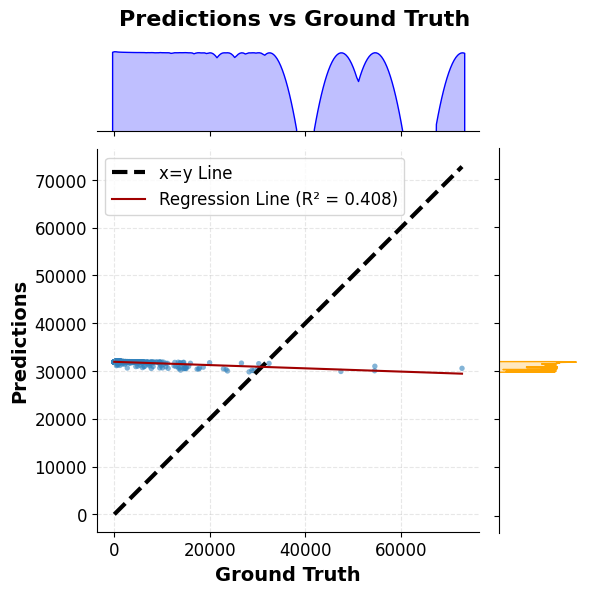

Plotting predictions vs ground truth for checkpoint 100
Max prediction: 83914.859375
Max ground truth: 72767.0


Plotting predictions vs ground truth for checkpoint 199
Max prediction: 62106.87890625
Max ground truth: 72767.0


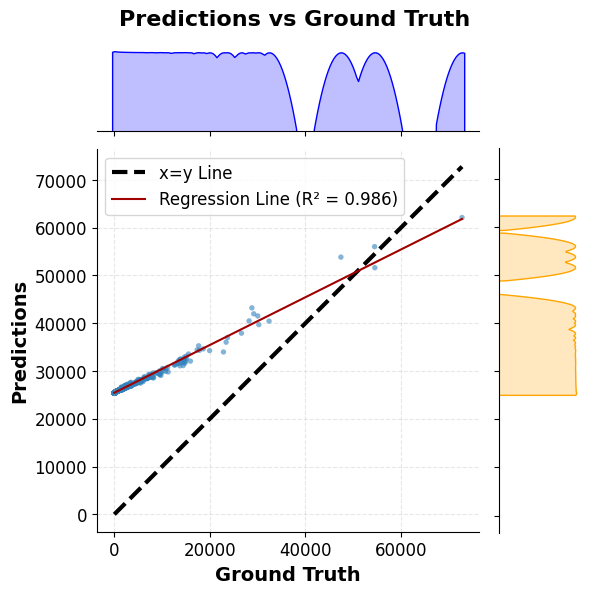

Plotting predictions vs ground truth for checkpoint 298
Max prediction: 59327.0390625
Max ground truth: 72767.0


Plotting predictions vs ground truth for checkpoint 397
Max prediction: 71032.7421875
Max ground truth: 72767.0


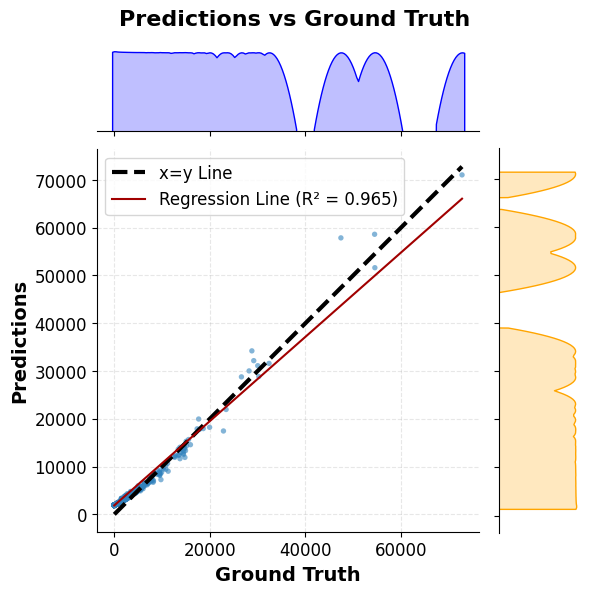

Plotting predictions vs ground truth for checkpoint 496
Max prediction: 76349.3515625
Max ground truth: 72767.0


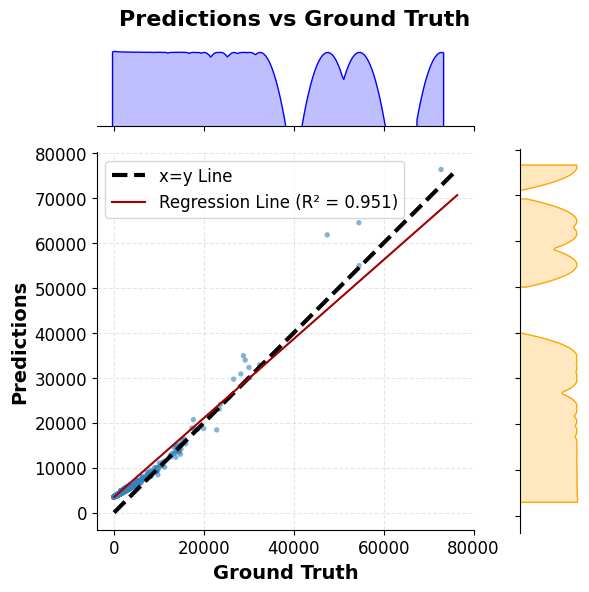

Plotting predictions vs ground truth for checkpoint 595
Max prediction: 75792.8828125
Max ground truth: 72767.0


Plotting predictions vs ground truth for checkpoint 694
Max prediction: 70613.59375
Max ground truth: 72767.0


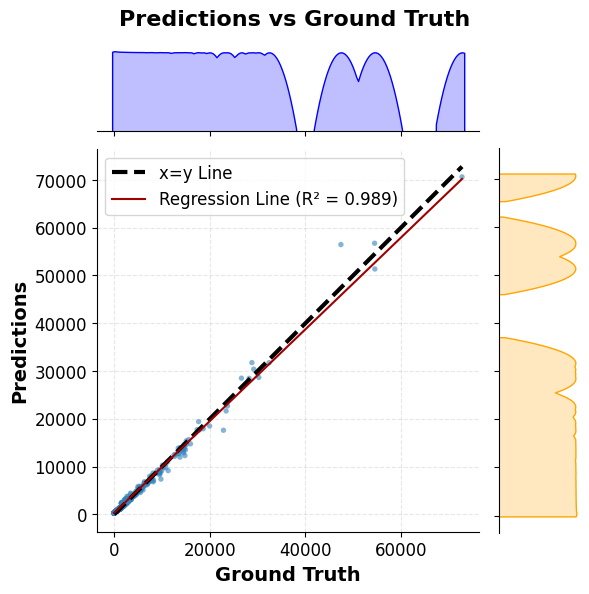

Plotting predictions vs ground truth for checkpoint 793
Max prediction: 79649.0390625
Max ground truth: 72767.0


Plotting predictions vs ground truth for checkpoint 892
Max prediction: 75276.171875
Max ground truth: 72767.0


Plotting predictions vs ground truth for checkpoint 991
Max prediction: 72467.5859375
Max ground truth: 72767.0


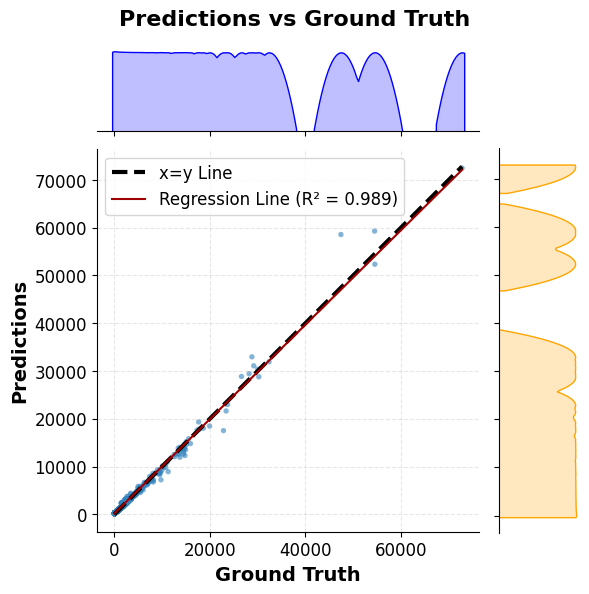

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import json
from matplotlib.ticker import LogLocator, NullFormatter

def plot_predictions_vs_ground_truth(json_file_path):
    # Read the JSON file
    with open(json_file_path, 'r') as file:
        data = json.load(file)
    
    # Extract predictions and ground truth
    predictions = np.array(data['predictions'])
    ground_truth = np.array(data['ground_truth'])

    # Print largest values
    print(f"Max prediction: {predictions.max()}")
    print(f"Max ground truth: {ground_truth.max()}")
    
    # Create the jointplot
    g = sns.JointGrid(height=6, ratio=4)
    
    # Add the scatter plot on the main axes
    g.ax_joint.scatter(ground_truth, predictions, c='#3182bd', alpha=0.6, s=15, edgecolors='none')
    
    # Add the distribution plots on the marginal axes with log scale
    sns.kdeplot(x=ground_truth, ax=g.ax_marg_x, color="blue", fill=True)
    sns.kdeplot(y=predictions, ax=g.ax_marg_y, color="orange", fill=True)
    
    # Set log scale for marginal plots with custom locator
    g.ax_marg_x.set_yscale('log')
    g.ax_marg_y.set_xscale('log')
    
    # Custom log locator to avoid overflow
    locmaj = LogLocator(base=10.0, numticks=10)
    g.ax_marg_x.yaxis.set_major_locator(locmaj)
    g.ax_marg_y.xaxis.set_major_locator(locmaj)
    g.ax_marg_x.yaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1, numticks=10))
    g.ax_marg_y.xaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1, numticks=10))
    
    # Remove labels from marginal plots
    g.ax_marg_x.yaxis.set_major_formatter(NullFormatter())
    g.ax_marg_y.xaxis.set_major_formatter(NullFormatter())
    
    # Calculate the range for the x=y line
    min_val = min(ground_truth.min(), predictions.min())
    max_val = max(ground_truth.max(), predictions.max())
    
    # Plot x=y line
    g.ax_joint.plot([min_val, max_val], [min_val, max_val], color='#000', linestyle='--', label='x=y Line', linewidth=3)
    
    # Fit and plot regression line
    slope, intercept, r_value, _, _ = stats.linregress(ground_truth, predictions)
    reg_line = slope * np.array([min_val, max_val]) + intercept
    g.ax_joint.plot([min_val, max_val], reg_line, color='#a10000', linestyle='-', 
                    label=f'Regression Line (R² = {r_value**2:.3f})', linewidth=1.5)
    
    # Customize the plot
    g.ax_joint.set_xlabel('Ground Truth', fontsize=14, fontweight='bold')
    g.ax_joint.set_ylabel('Predictions', fontsize=14, fontweight='bold')
    g.fig.suptitle('Predictions vs Ground Truth', fontsize=16, fontweight='bold')
    g.ax_joint.legend(fontsize=12, loc='upper left')
    g.ax_joint.grid(True, linestyle='--', alpha=0.3)
    
    # Set aspect ratio to equal for a square plot
    g.ax_joint.set_aspect('equal')
    
    # Adjust plot limits to include all points
    margin = (max_val - min_val) * 0.05
    g.ax_joint.set_xlim(min_val - margin, max_val + margin)
    g.ax_joint.set_ylim(min_val - margin, max_val + margin)
    
    # Improve tick label visibility
    g.ax_joint.tick_params(axis='both', which='major', labelsize=12)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

for c in range(1, 1001, 99):
    try:
        print(f"Plotting predictions vs ground truth for checkpoint {c}")
        json_file_path = f'/home/zxj/Dev/MLSC/code/ESC-GNN/output/fine/Set_1/ESC-GNN/8/{c}_cpt_test.json'
        plot_predictions_vs_ground_truth(json_file_path)
    except Exception as e:
        print(f"Error processing results for checkpoint {c}: {e}")

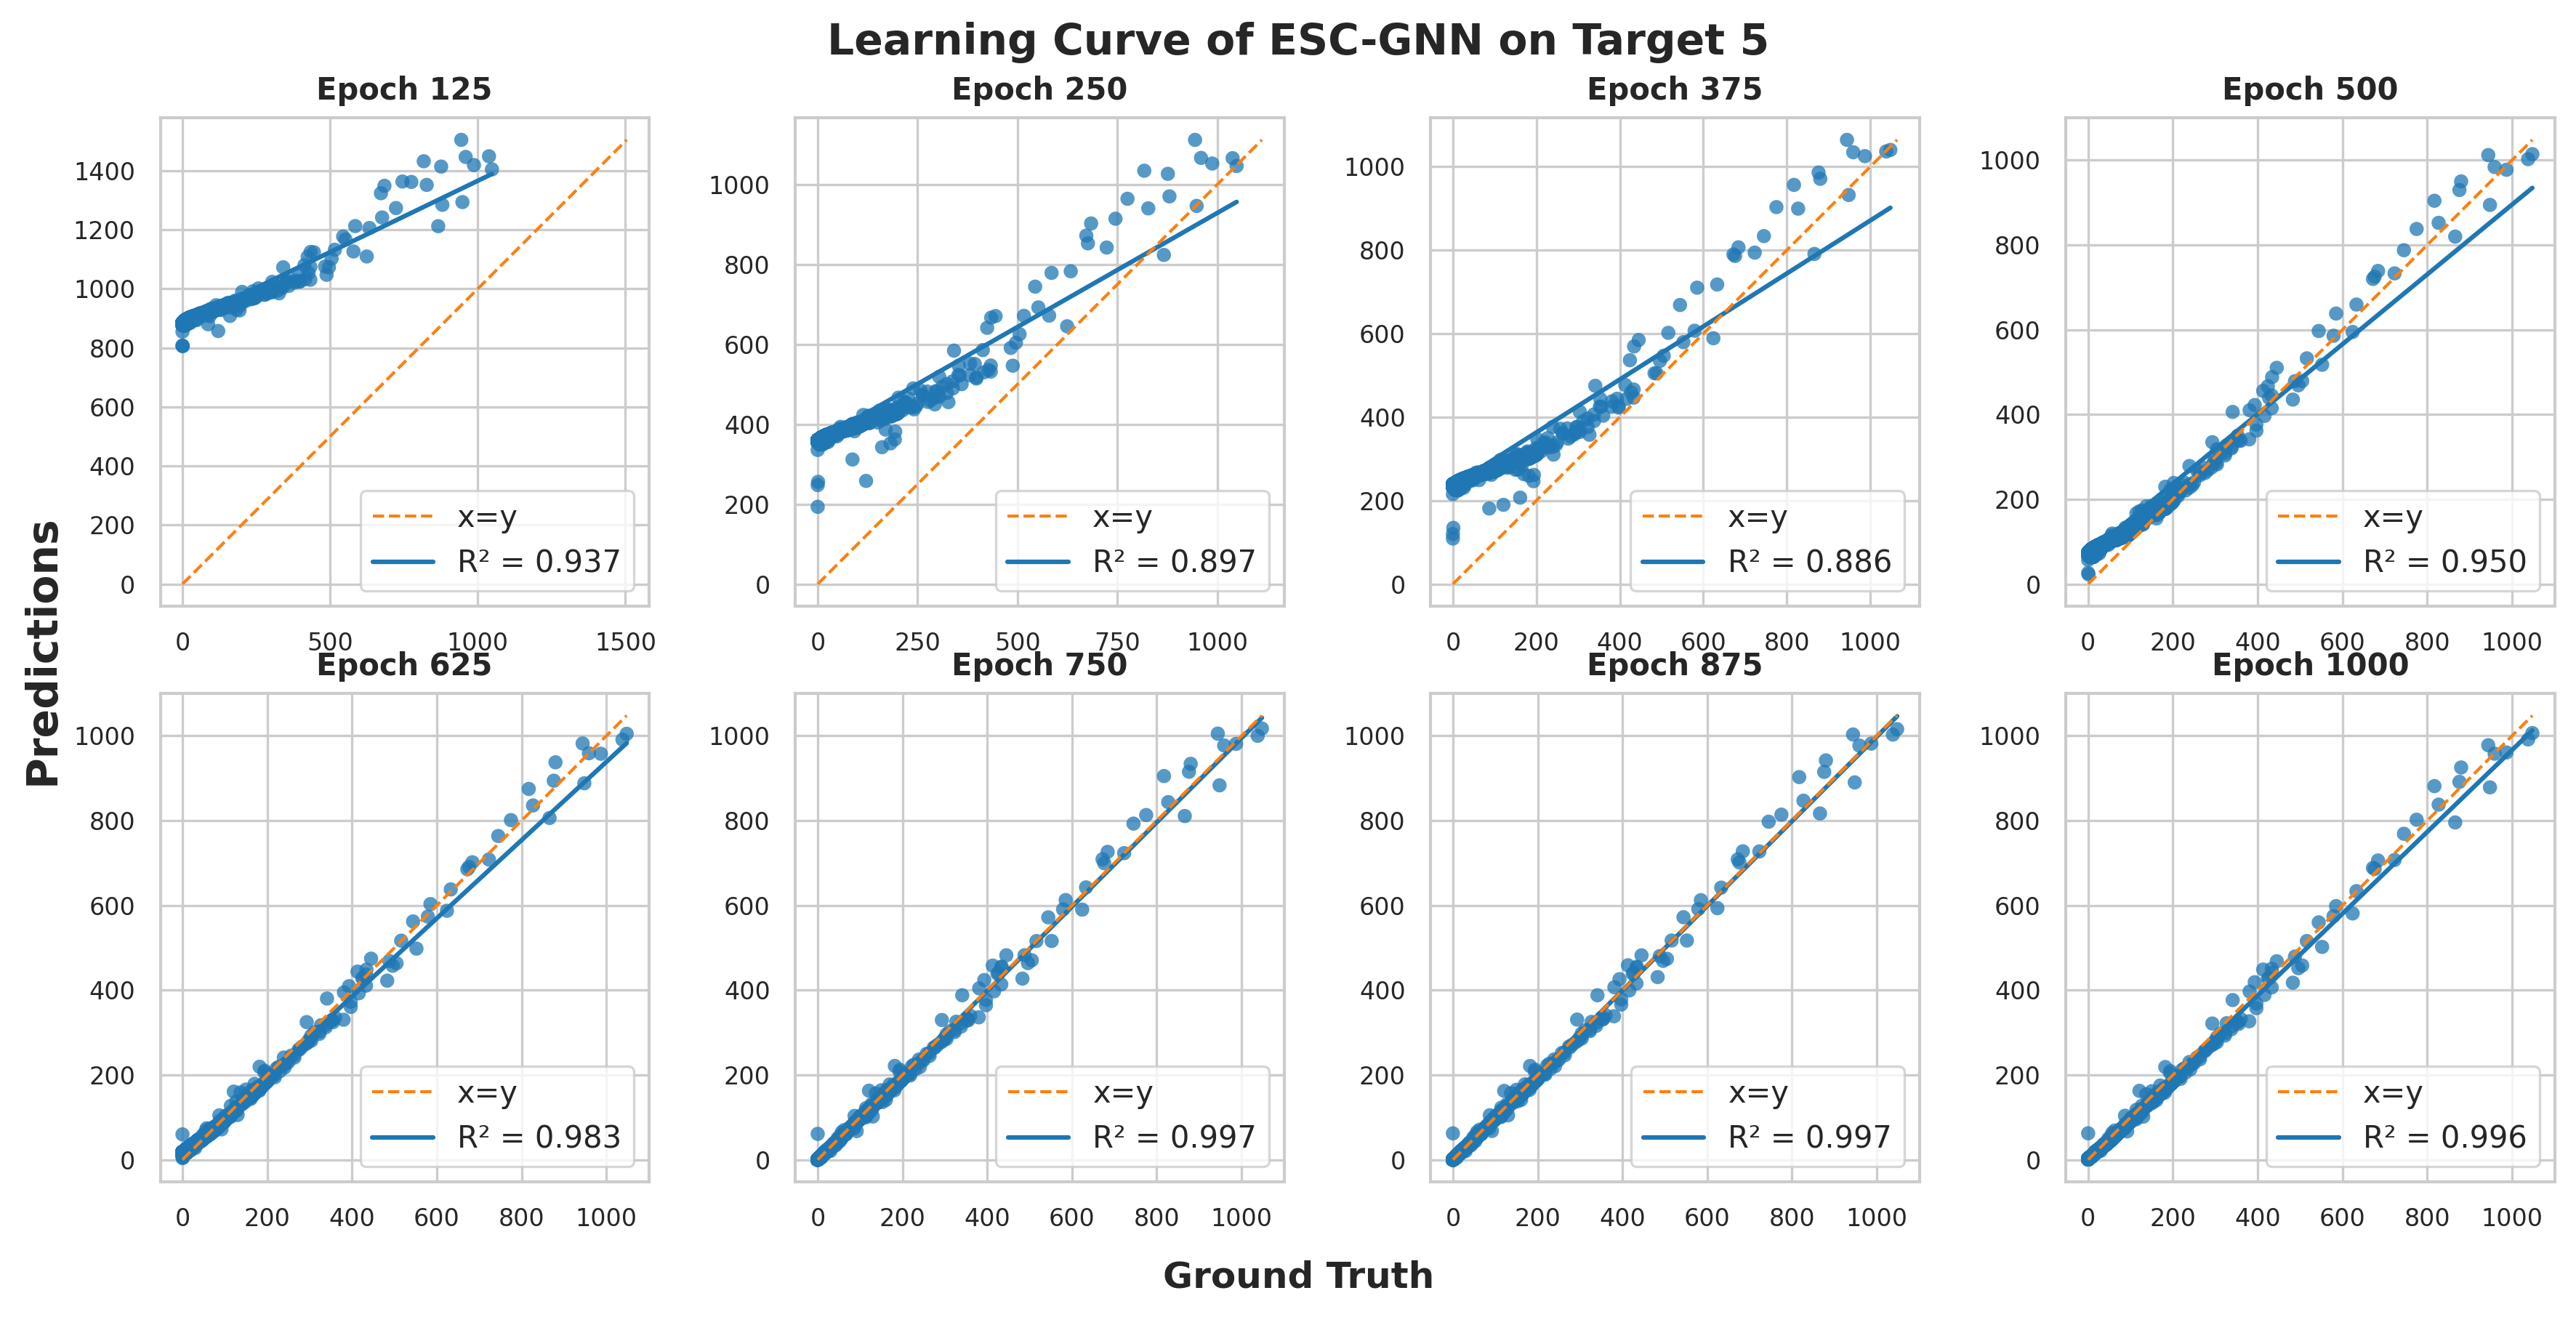

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import json, os
from matplotlib.ticker import LogLocator, NullFormatter

def plot_predictions_vs_ground_truth(ax, json_file_path, epoch):
    # Read the JSON file
    with open(json_file_path, 'r') as file:
        data = json.load(file)
    
    # Extract predictions and ground truth
    predictions = np.array(data['predictions'])
    ground_truth = np.array(data['ground_truth'])

    # Add the scatter plot on the main axes
    ax.scatter(ground_truth, predictions, alpha=0.75, s=22, edgecolors='none')
    
    # Fit and plot regression line
    slope, intercept, r_value, _, _ = stats.linregress(ground_truth, predictions)
    x_reg = np.array([ground_truth.min(), ground_truth.max()])
    y_reg = slope * x_reg + intercept
    ax.plot(x_reg, y_reg, linestyle='-', 
            label=f'R² = {r_value**2:.3f}', linewidth=1.5)
    
    # Plot x=y line
    min_val = min(ground_truth.min(), predictions.min())
    max_val = max(ground_truth.max(), predictions.max())
    ax.plot([min_val, max_val], [min_val, max_val], linestyle='--', label='x=y', linewidth=1)
    
    # Customize the plot
    ax.set_aspect('equal')
    ax.tick_params(axis='both', which='major', labelsize=8)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], fontsize=10, loc='lower right')
    ax.set_title(f'Epoch {epoch}', fontsize=10, fontweight='bold')

    # Set limits with a small margin
    margin = (max_val - min_val) * 0.05
    ax.set_xlim(min_val - margin, max_val + margin)
    ax.set_ylim(min_val - margin, max_val + margin)



for target in range(4,6):
    # Set the style for the plot

    sns.color_palette("Set2")

   # Set the font family
    plt.rcParams['font.family'] = ['DejaVu Sans', 'sans-serif']

    # Set the style for the plot
    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale=1.2)

    # Create the main figure
    fig, axes = plt.subplots(2, 4, figsize=(12, 6), dpi=300)
    axes = axes.flatten()
    for i, c in enumerate(range(125, 1001, 125)):
        try:
            # print(f"Plotting predictions vs ground truth for checkpoint {c}")
            json_file_path = f'/home/zxj/Dev/MLSC/code/ESC-GNN/output/fine/Set_1/ESC-GNN/{target}/{c}_cpt_test.json'
            plot_predictions_vs_ground_truth(axes[i], json_file_path, c)
        except Exception as e:
            print(f"Error processing results for checkpoint {c}: {e}")

    # Add common labels
    fig.text(0.5, 0.02, 'Ground Truth', ha='center', va='center', fontsize=12, fontweight='bold')
    fig.text(0.02, 0.5, 'Predictions', ha='center', va='center', rotation='vertical', fontsize=14, fontweight='bold')

    # Add title with more space
    fig.suptitle(f'Learning Curve of ESC-GNN on Target {target}', fontsize=14, fontweight='bold', y=0.98)

    # Adjust the layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.065, right=0.98, hspace=0.1, wspace=0.30)

    # Save the figure
    save_path = f'plots/learning_curve/ESC-GNN'
    os.makedirs(save_path, exist_ok=True)
    # plt.savefig(f'{save_path}/target_{target}.pdf', format='pdf', bbox_inches='tight')
    # plt.savefig(f'{save_path}/target_{target}.png', format='png', dpi=300, bbox_inches='tight')

    plt.show()

## O1 Sense of beauty

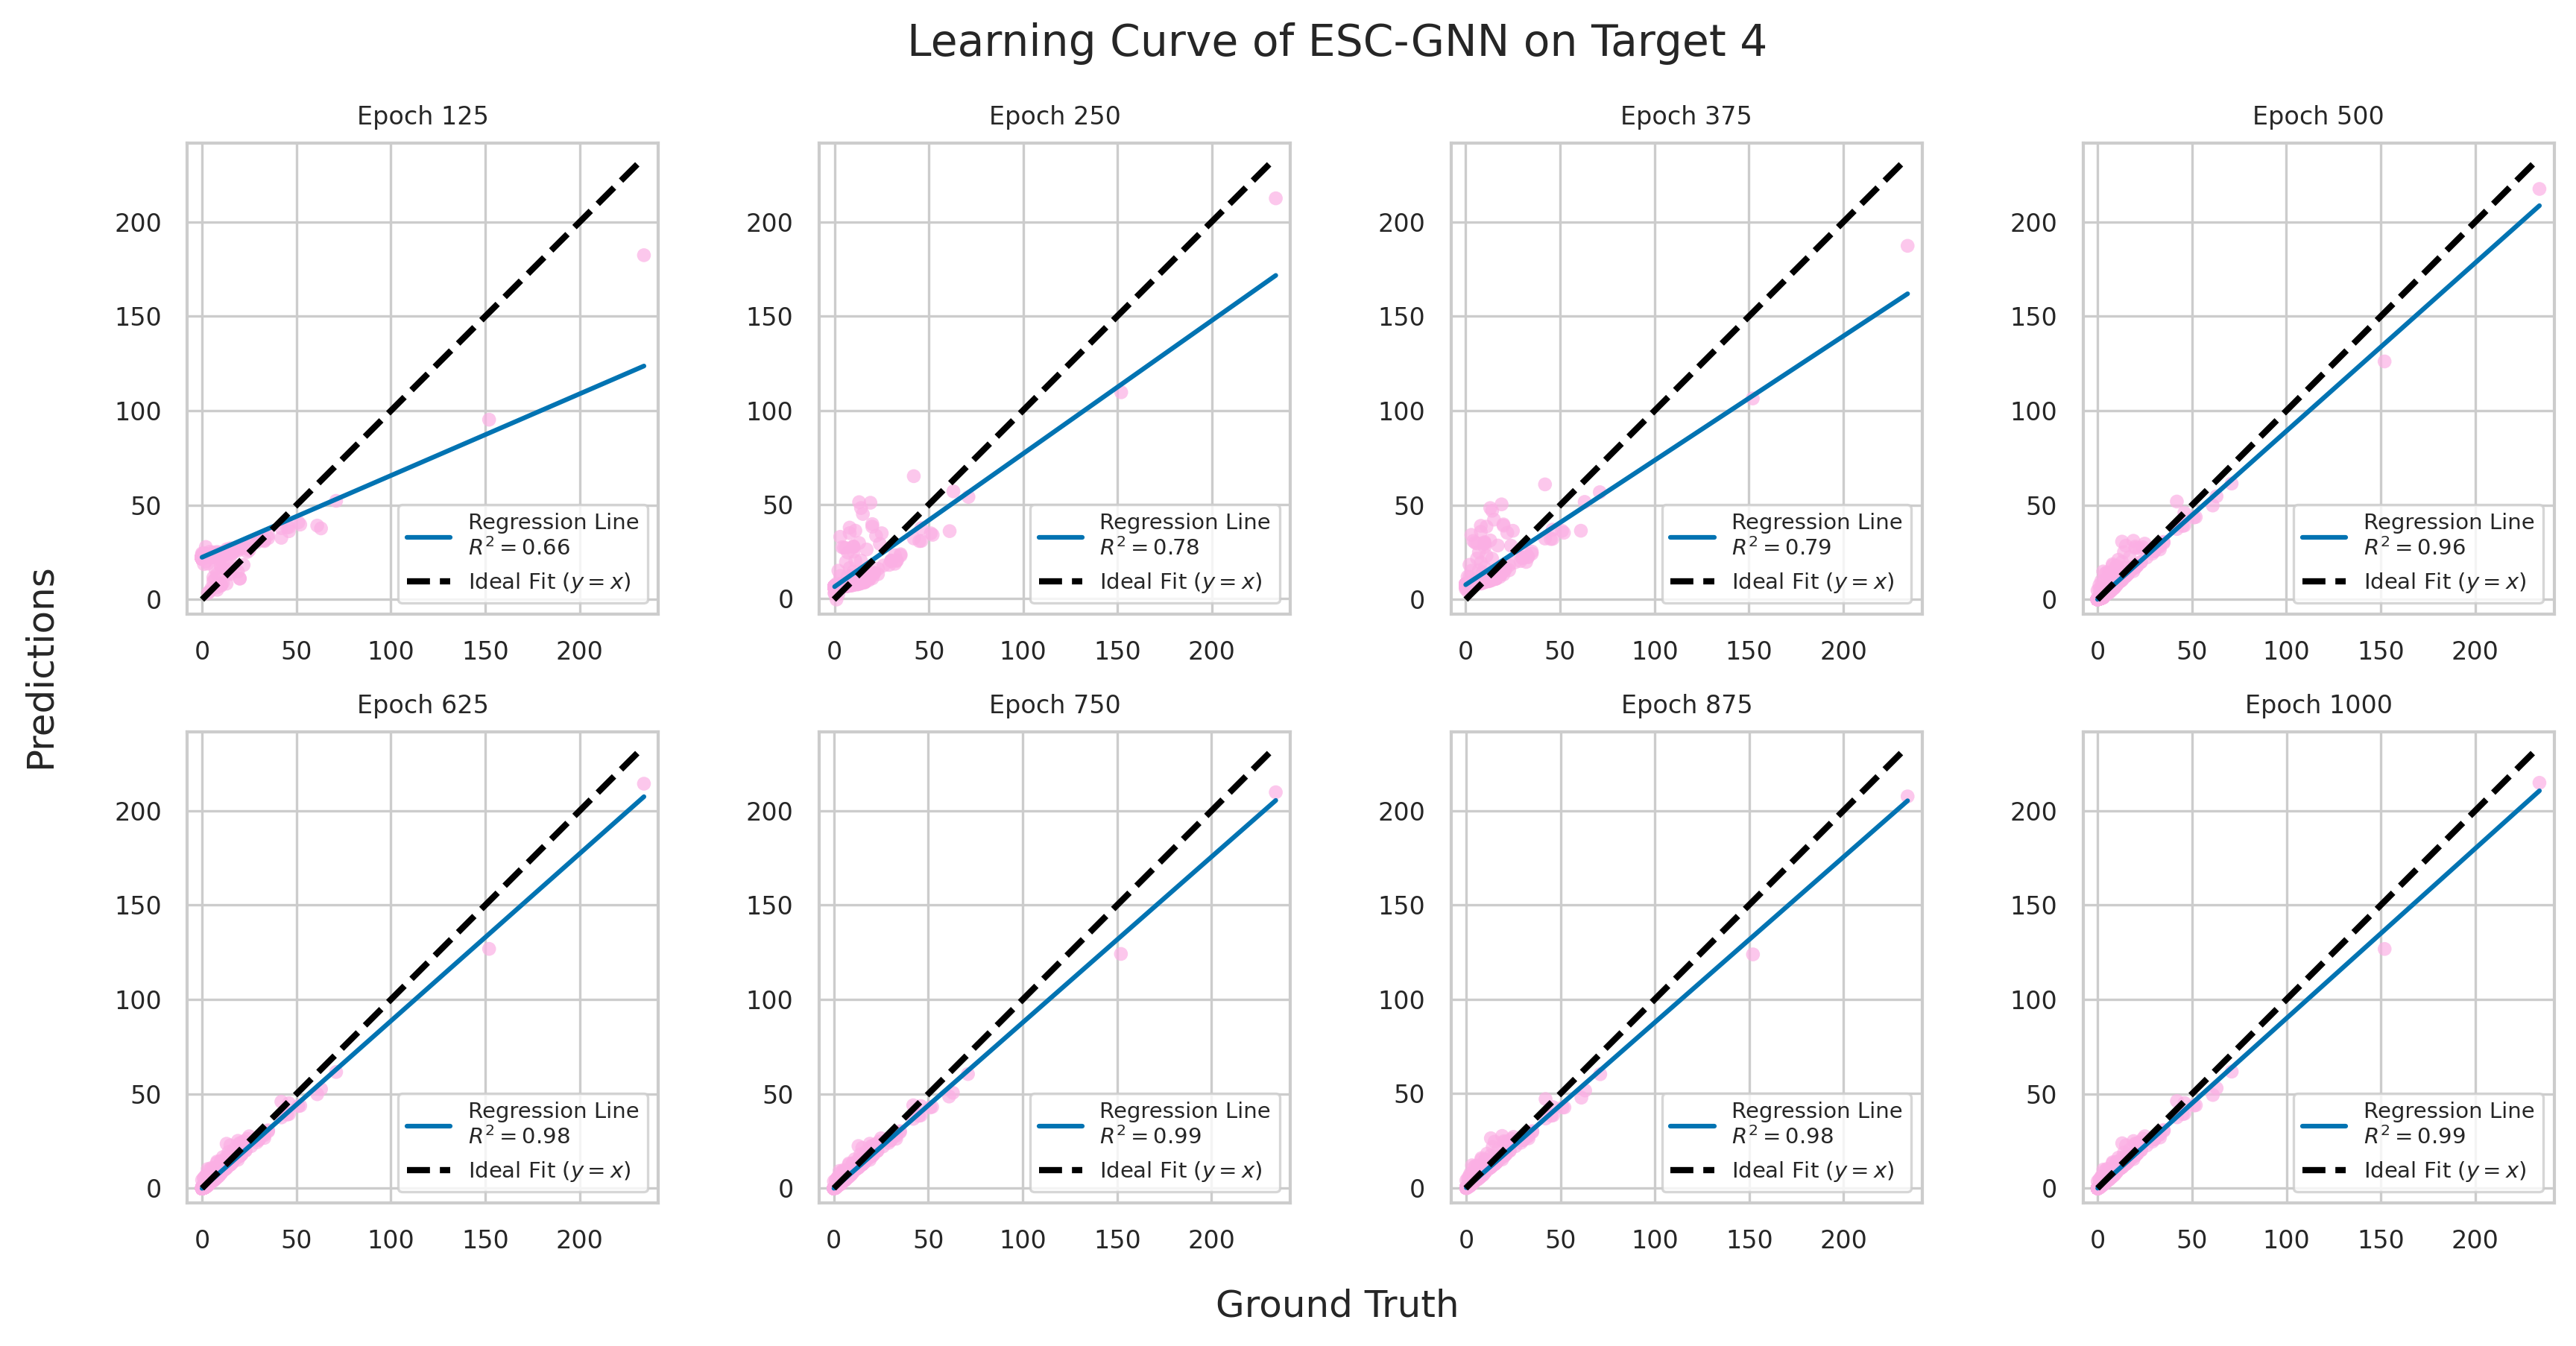

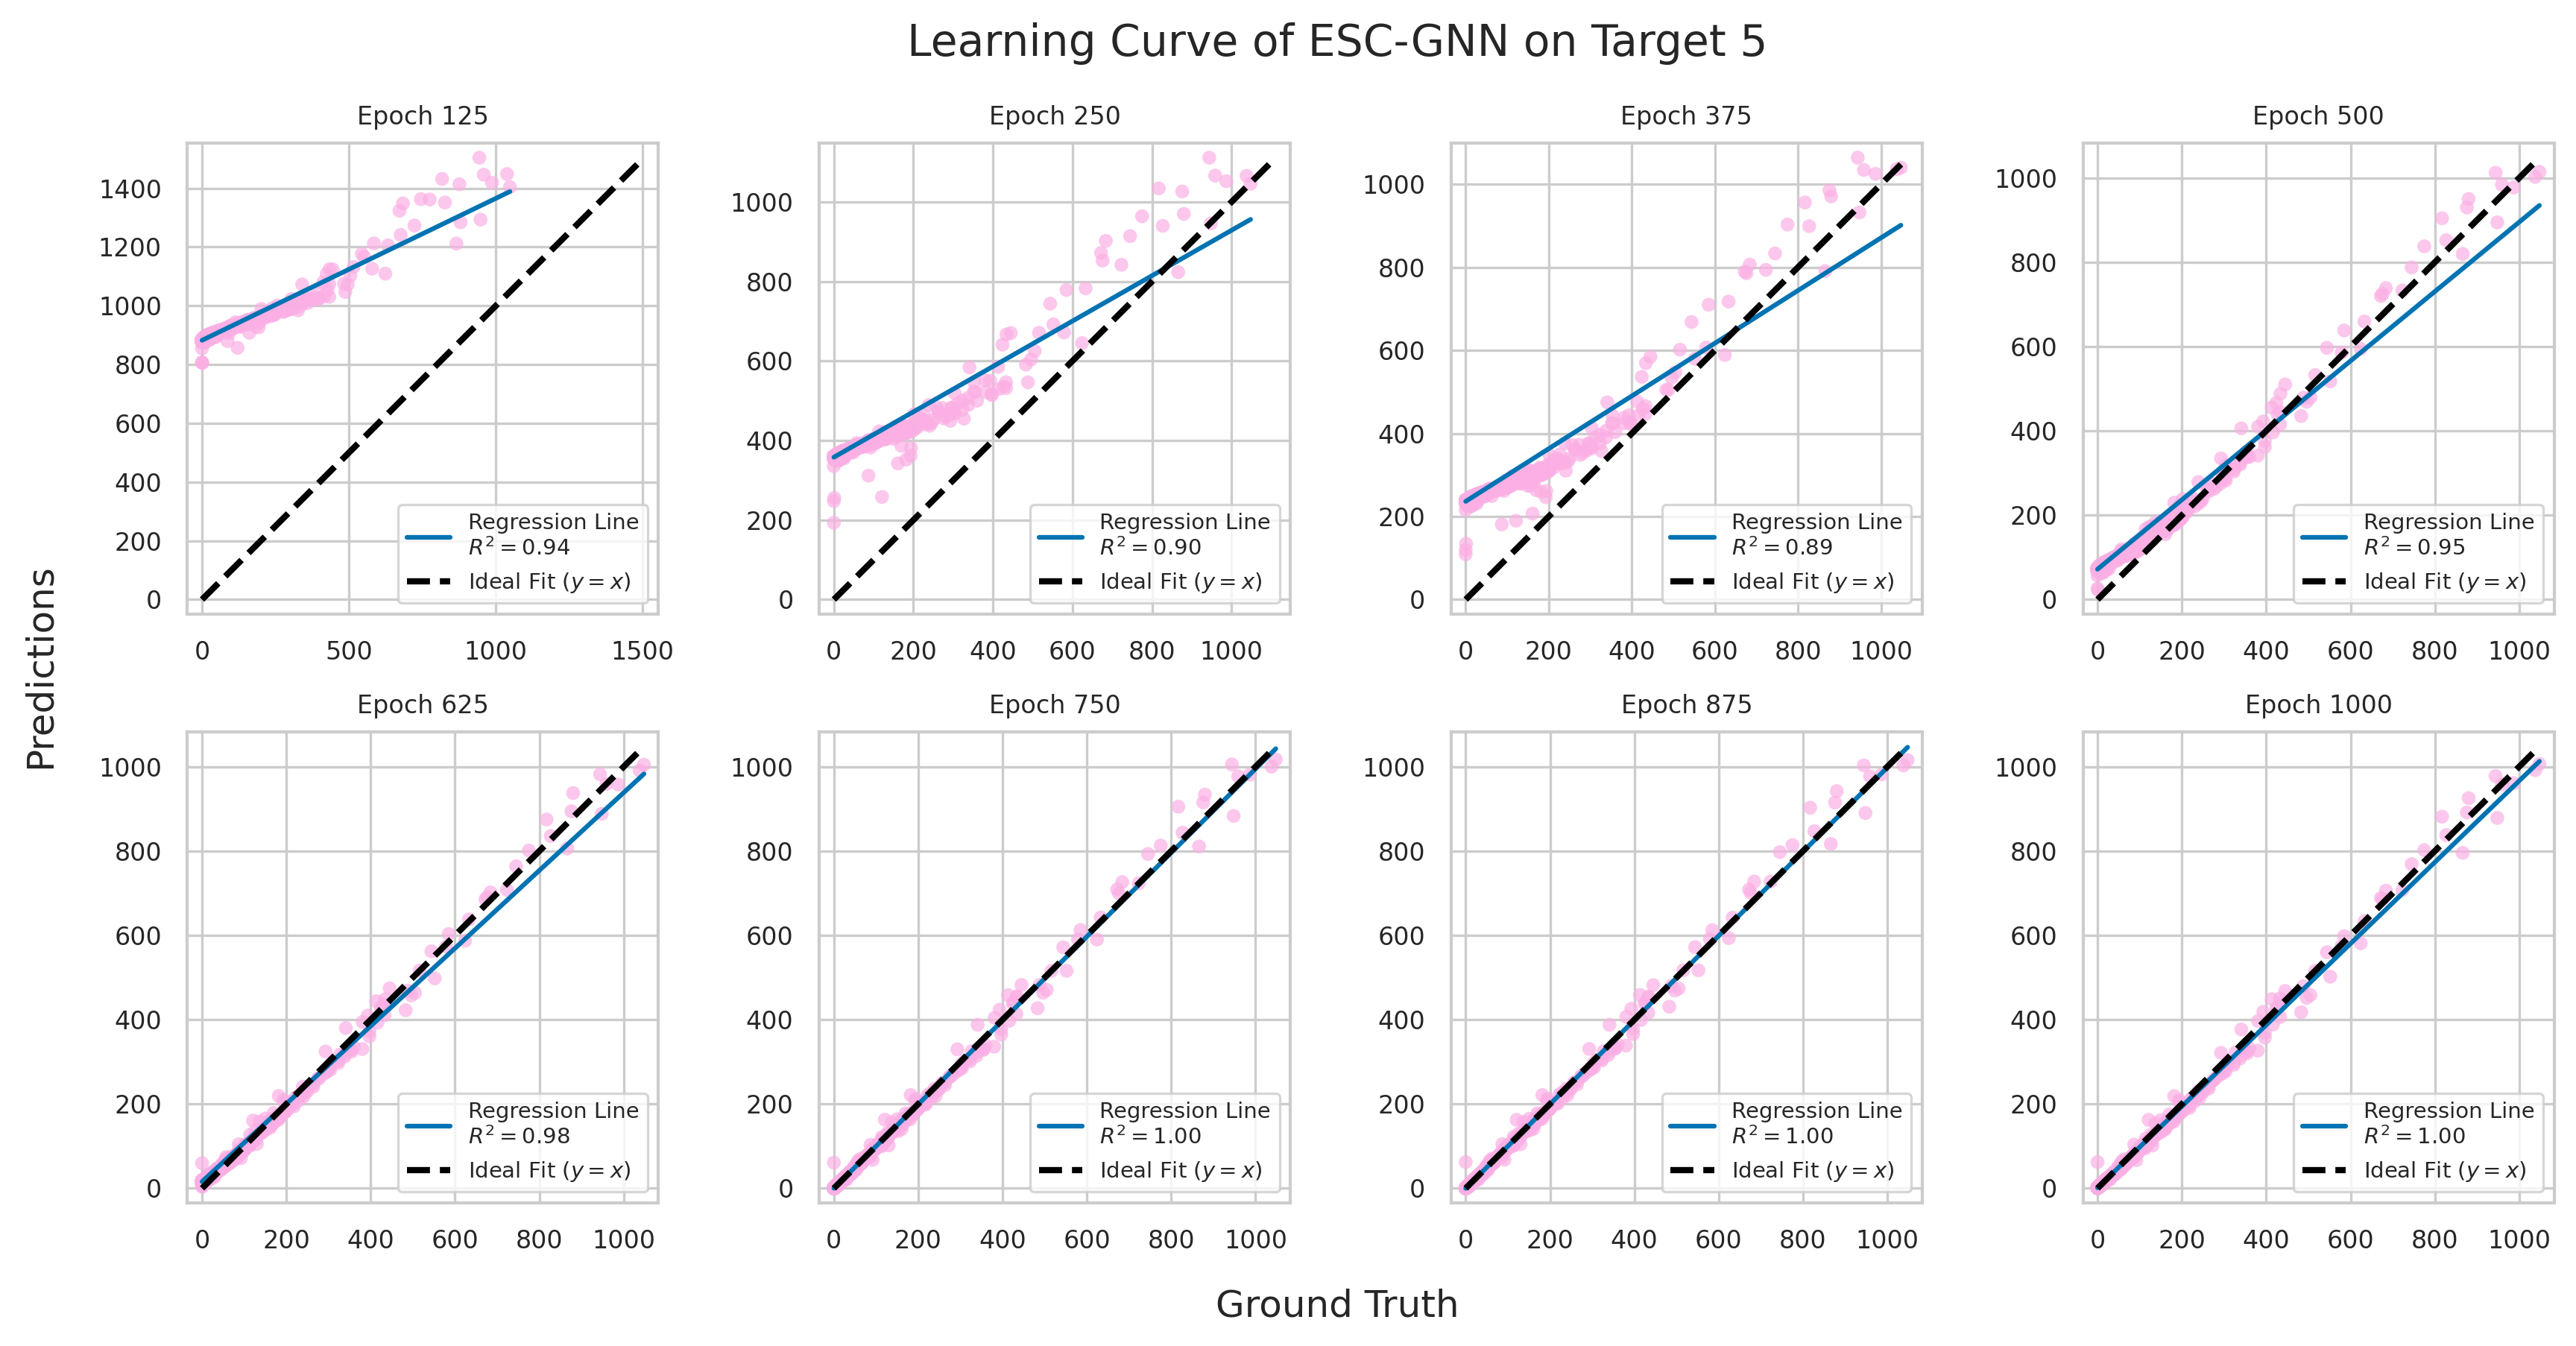

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import json
import os

def plot_predictions_vs_ground_truth(ax, json_file_path, epoch):
    # Load data
    with open(json_file_path, 'r') as file:
        data = json.load(file)
    predictions = np.array(data['predictions'])
    ground_truth = np.array(data['ground_truth'])

    # Scatter plot
    ax.scatter(
        ground_truth, predictions,
        c='C6', alpha=0.69, s=20, edgecolors='none'
    )
    
    # Regression line
    slope, intercept, r_value, _, _ = stats.linregress(ground_truth, predictions)
    x_reg = np.linspace(ground_truth.min(), ground_truth.max(), 100)
    y_reg = slope * x_reg + intercept
    ax.plot(
        x_reg, y_reg, color='C0', linestyle='-', linewidth=1.5,
        label=f'Regression Line\n$R^2 = {r_value**2:.2f}$'
    )

    # x=y line
    min_val = min(ground_truth.min(), predictions.min())
    max_val = max(ground_truth.max(), predictions.max())
    ax.plot(
        [min_val, max_val], [min_val, max_val],
        color='#000', linestyle='--', linewidth=2, label='Ideal Fit ($y=x$)'
    )

    # Customize the plot
    ax.set_aspect('equal')
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.legend(fontsize=7, loc='lower right')
    ax.set_title(f'Epoch {epoch}', fontsize=8)
    # ax.set_xlabel('Ground Truth', fontsize=10)
    # ax.set_ylabel('Predictions', fontsize=10)

    # Set limits with a small margin
    margin = (max_val - min_val) * 0.033
    ax.set_xlim(min_val - margin, max_val + margin)
    ax.set_ylim(min_val - margin, max_val + margin)

# Main plotting function
def create_learning_curve_plots(target):
    # Set the style for the plot
    plt.style.use('default')
    sns.set_style("whitegrid")
    sns.set_context('paper', font_scale=0.9)  # Slightly reduce font size
    sns.set_palette('colorblind')
    plt.rcParams['font.family'] = ['DejaVu Sans', 'sans-serif']

    # Create the figure with adjusted size
    fig, axes = plt.subplots(2, 4, figsize=(12, 6), dpi=300)  # Reduced height
    axes = axes.flatten()

    # Loop over checkpoints
    for i, c in enumerate(range(125, 1001, 125)):
        try:
            json_file_path = (
                f'/home/zxj/Dev/MLSC/code/ESC-GNN/output/fine/Set_1/ESC-GNN/{target}/{c}_cpt_test.json'
            )
            plot_predictions_vs_ground_truth(axes[i], json_file_path, c)
        except Exception as e:
            print(f"Error processing results for checkpoint {c}: {e}")
            axes[i].set_visible(False)

    # Adjust layout
    fig.supxlabel('Ground Truth', fontsize=12, y=0.01)
    fig.supylabel('Predictions', fontsize=12, x=0.01)
    fig.suptitle(
        f'Learning Curve of ESC-GNN on Target {target}',
        fontsize=14, y=0.98
    )

    # Adjust subplots to be closer together
    plt.tight_layout()
    plt.subplots_adjust(top=0.89, bottom=0.10, left=0.045, right=0.98, hspace=0.25, wspace=0.03)

    # Save the figure
    # save_path = f'plots/learning_curve/ESC-GNN'
    # os.makedirs(save_path, exist_ok=True)
    # plt.savefig(f'{save_path}/target_{target}.pdf', format='pdf', bbox_inches='tight')
    # plt.savefig(f'{save_path}/target_{target}.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

# Run the plotting function for targets 4 and 5
for target in range(4, 6):
    create_learning_curve_plots(target)

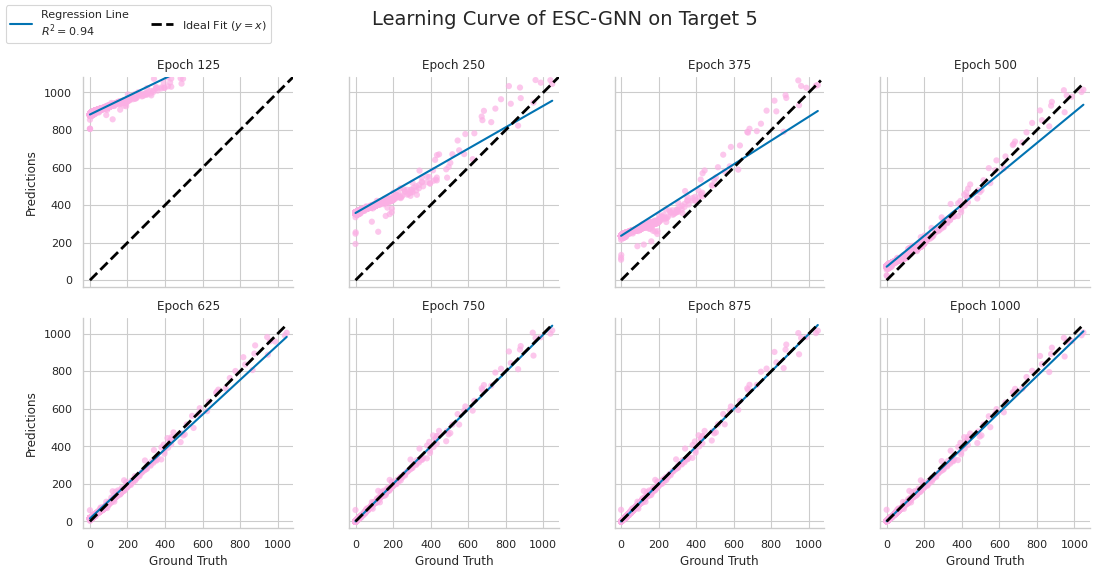

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import json
import os
import pandas as pd

def load_data(target):
    all_data = []
    for epoch in range(125, 1001, 125):
        json_file_path = f'/home/zxj/Dev/MLSC/code/ESC-GNN/output/fine/Set_1/ESC-GNN/{target}/{epoch}_cpt_test.json'
        with open(json_file_path, 'r') as file:
            data = json.load(file)
        df = pd.DataFrame({
            'ground_truth': data['ground_truth'],
            'predictions': data['predictions'],
            'epoch': epoch
        })
        all_data.append(df)
    return pd.concat(all_data, ignore_index=True)

def plot_predictions(data, **kwargs):
    ax = plt.gca()
    
    # Scatter plot
    ax.scatter(data['ground_truth'], data['predictions'], c='C6', alpha=0.69, s=20, edgecolors='none')
    
    # Regression line
    slope, intercept, r_value, _, _ = stats.linregress(data['ground_truth'], data['predictions'])
    x_reg = np.linspace(data['ground_truth'].min(), data['ground_truth'].max(), 100)
    y_reg = slope * x_reg + intercept
    ax.plot(x_reg, y_reg, color='C0', linestyle='-', linewidth=1.5,
            label=f'Regression Line\n$R^2 = {r_value**2:.2f}$')
    
    # x=y line
    min_val = min(data['ground_truth'].min(), data['predictions'].min())
    max_val = max(data['ground_truth'].max(), data['predictions'].max())
    ax.plot([min_val, max_val], [min_val, max_val], color='#000', linestyle='--', linewidth=2, label='Ideal Fit ($y=x$)')
    
    # Customize the plot
    ax.set_aspect('equal')
    ax.tick_params(axis='both', which='major', labelsize=8)
    
    # Set limits with a small margin
    margin = (max_val - min_val) * 0.033
    ax.set_xlim(min_val - margin, max_val + margin)
    ax.set_ylim(min_val - margin, max_val + margin)

def create_learning_curve_plots(target):
    # Set the style for the plot
    sns.set_style("whitegrid")
    sns.set_context('paper', font_scale=0.9)
    sns.set_palette('colorblind')
    plt.rcParams['font.family'] = ['DejaVu Sans', 'sans-serif']

    # Load data
    data = load_data(target)

    # Create FacetGrid
    g = sns.FacetGrid(data, col="epoch", col_wrap=4, height=2.8, aspect=1)
    
    # Map the plot function to the grid
    g.map_dataframe(plot_predictions)
    
    # Adjust the layout
    g.fig.suptitle(f'Learning Curve of ESC-GNN on Target {target}', fontsize=14, y=1.02)
    g.set_axis_labels("Ground Truth", "Predictions")
    g.set_titles("Epoch {col_name}")
    
    # Add a common legend
    lines_labels = [ax.get_legend_handles_labels() for ax in g.axes.flat]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    g.fig.legend(lines[:2], labels[:2], loc='upper left', ncol=2,  fontsize=8)

    # Adjust the layout to bring subplots closer
    plt.tight_layout()
    g.fig.subplots_adjust(top=0.9, wspace=0.05, hspace=0.15)

    # Save the figure
    save_path = f'plots/learning_curve/ESC-GNN'
    os.makedirs(save_path, exist_ok=True)
    # plt.savefig(f'{save_path}/target_{target}.pdf', format='pdf', bbox_inches='tight')
    # plt.savefig(f'{save_path}/target_{target}.png', format='png', dpi=300, bbox_inches='tight')
    
    plt.show()

# Run the plotting function for targets 4 and 5
for target in range(5, 6):
    create_learning_curve_plots(target)

### TEST


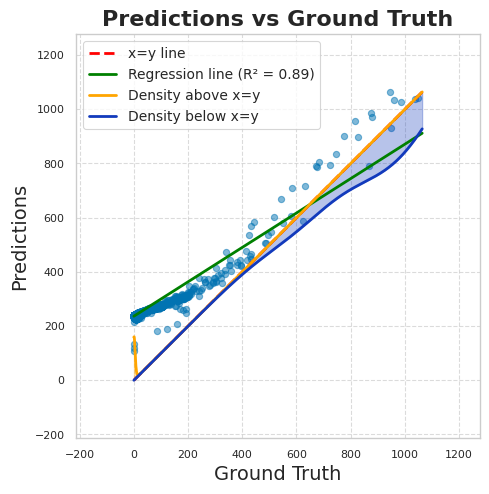

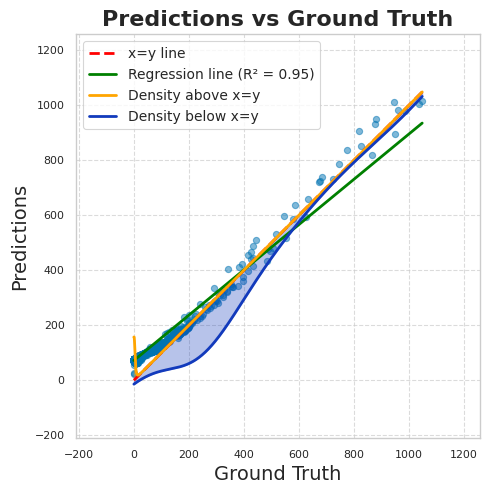

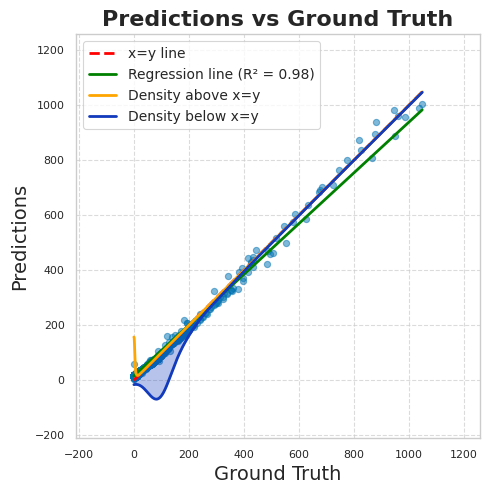

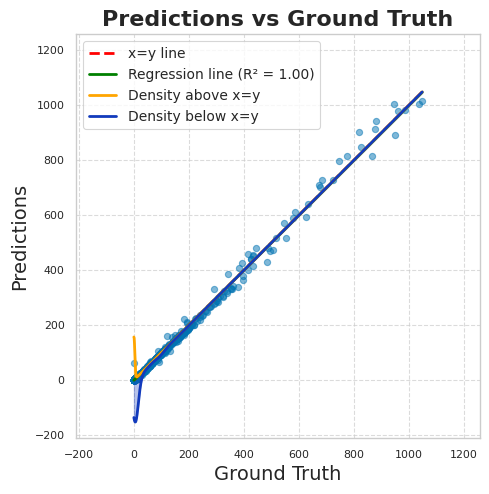

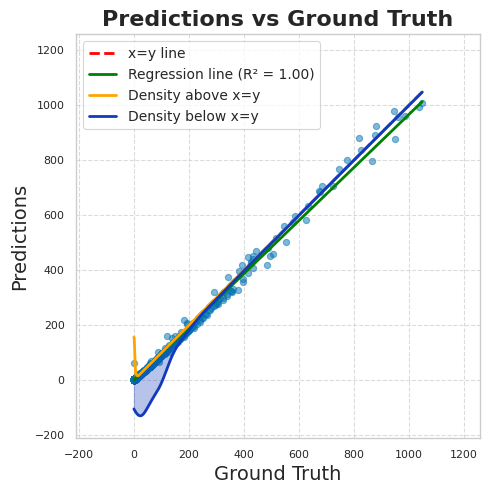

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

def scatter_plot_with_xy_distribution(ground_truth, predictions, title="Predictions vs Ground Truth"):
    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(6, 5))
    
    # Scatter plot
    ax.scatter(ground_truth, predictions, alpha=0.5, color='C0', s=20)
    
    # x=y line
    min_val = min(ground_truth.min(), predictions.min())
    max_val = max(ground_truth.max(), predictions.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', label='x=y line', linewidth=2)
    
    # Regression line
    slope, intercept, r_value, _, _ = stats.linregress(ground_truth, predictions)
    x_reg = np.linspace(min_val, max_val, 100)
    y_reg = slope * x_reg + intercept
    ax.plot(x_reg, y_reg, 'g-', label=f'Regression line (R² = {r_value**2:.2f})', linewidth=2)
    
    # Calculate points along x=y line
    xy_line = np.linspace(min_val, max_val, 1000)
    
    # Separate points above and below x=y line
    above_xy = predictions > ground_truth
    below_xy = predictions <= ground_truth
    
    # Calculate KDE for points above and below x=y line
    kde_above = stats.gaussian_kde(ground_truth[above_xy])
    kde_below = stats.gaussian_kde(ground_truth[below_xy])
    
    kde_values_above = kde_above(xy_line)
    kde_values_below = kde_below(xy_line)
    
    # Normalize KDE values and scale for visibility
    scale_factor = (max_val - min_val) * 0.15  # Adjust this to change the height of the distribution curves
    kde_normalized_above = kde_values_above / kde_values_above.max() * scale_factor
    kde_normalized_below = kde_values_below / kde_values_below.max() * scale_factor
    
    # Plot KDE curves above and below x=y line
    ax.plot(xy_line, xy_line + kde_normalized_above, color='orange', linewidth=2, label='Density above x=y')
    ax.fill_between(xy_line, xy_line, xy_line + kde_normalized_above, alpha=0.3, color='orange')
    
    ax.plot(xy_line, xy_line - kde_normalized_below, color='#123abc', linewidth=2, label='Density below x=y')
    ax.fill_between(xy_line, xy_line, xy_line - kde_normalized_below, alpha=0.3, color='#123abc')
    
    # Set labels and title
    ax.set_xlabel('Ground Truth', fontsize=14)
    ax.set_ylabel('Predictions', fontsize=14)
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.legend(fontsize=10, loc='upper left')
    
    # Set aspect ratio to equal for a square plot
    ax.set_aspect('equal')
    
    # Set plot limits
    margin = (max_val - min_val) * 0.2  # Increased margin to accommodate the distribution curves
    ax.set_xlim(min_val - margin, max_val + margin)
    ax.set_ylim(min_val - margin, max_val + margin)
    
    # Add grid
    ax.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

# Example usage
for ep in range(375, 1001, 125):
    json_file_path = f'/home/zxj/Dev/MLSC/code/ESC-GNN/output/fine/Set_1/ESC-GNN/{5}/{ep}_cpt_test.json'
    with open(json_file_path, 'r') as file:
        data = json.load(file)

    np.random.seed(0)
    ground_truth = np.random.uniform(0, 10, 1000)
    predictions = ground_truth + 1.5 * np.random.normal(0, 1, 1000)

    scatter_plot_with_xy_distribution(np.array(data['ground_truth']), np.array(data['predictions']), title="Predictions vs Ground Truth")